## Step 0: Import libraries

In [1]:
# Pandas is used for data manipulation
import pandas as pd
import numpy as np
%matplotlib inline

## Step1: Data preparation (data loading, cleaning,convertion,exploration...)

### Load data (train & test datasets) and append test dataset to train dataset ,making a single dataframe

In [2]:
# Define 'columns' to be used to set dataframe's columns
columns=['age','workclass','fnlwgt','education','education-num','marital-status','occupation','relationship','race','sex','capital-gain','capital-loss','hours-per-week','native-country','income']
# Skip the first row. 'header' set to None as there is no feature names in the file. We use 'name=' to set dataframe's columns.
df=pd.read_csv('adult.data',header=None,names=columns)
print(df.columns)
print(df.shape)
df_test=pd.read_csv('adult.test',skiprows=[0],header=None,names=columns)
df=df.append(df_test,ignore_index=True)
df.shape

Index(['age', 'workclass', 'fnlwgt', 'education', 'education-num',
       'marital-status', 'occupation', 'relationship', 'race', 'sex',
       'capital-gain', 'capital-loss', 'hours-per-week', 'native-country',
       'income'],
      dtype='object')
(32561, 15)


(48842, 15)

### Strip white spaces and trailing dot for some of feature columns

In [3]:
# strip white space and trailing dot from  for some columns!
df['income']=df['income'].apply(lambda x: x.replace(' ','').replace('.',''))
df['sex']=df['sex'].apply(lambda x: x.replace(' ',''))
df['race']=df['race'].apply(lambda x: x.replace(' ',''))
df['relationship']=df['relationship'].apply(lambda x: x.replace(' ',''))
df['occupation']=df['occupation'].apply(lambda x: x.replace(' ',''))
df['education']=df['education'].apply(lambda x: x.replace(' ',''))
df['marital-status']=df['marital-status'].apply(lambda x: x.replace(' ',''))
df['native-country']=df['native-country'].apply(lambda x: x.replace(' ',''))
# add a new column of boolean type 
df['income_greater_50K']=df.income=='>50K'

### Some data exploration

In [4]:
table=pd.pivot_table(df,index=['occupation','sex'],values=['age'],aggfunc=[np.mean])
table

mean
                                age
occupation        sex              
?                 Female  36.092694
                  Male    43.364583
Adm-clerical      Female  36.990714
                  Male    37.606949
Armed-Forces      Male    31.466667
Craft-repair      Female  39.811146
                  Male    38.963897
Exec-managerial   Female  39.635584
                  Male    43.231213
Farming-fishing   Female  39.578947
                  Male    41.396416
Handlers-cleaners Female  35.043307
                  Male    32.320682
Machine-op-inspct Female  38.559701
                  Male    37.437782
Other-service     Female  35.656783
                  Male    34.444045
Priv-house-serv   Female  43.982456
                  Male    33.928571
Prof-specialty    Female  38.686441
                  Male    41.628499
Protective-serv   Female  35.368852
                  Male    39.399535
Sales             Female  33.074987
                  Male    39.780714
Tech-support      Female  35.718861
                  Male    38.059955
Transport-moving  Female  39.511811
                  Male    40.716338

In [5]:
df['dumb'] = int(1)
table=pd.pivot_table(df,index=['race'],columns=['education'],values=['dumb'],aggfunc=[np.sum],margins=True,fill_value=0)
df.drop('dumb',axis=1,inplace=True)
table

sum                                                \
                      dumb                                                 
education             10th    11th   12th 1st-4th 5th-6th 7th-8th    9th   
race                                                                       
Amer-Indian-Eskimo    22.0    26.0    5.0     4.0     2.0    10.0    9.0   
Asian-Pac-Islander    16.0    27.0   15.0    10.0    28.0    14.0   10.0   
Black                182.0   252.0  105.0    24.0    41.0    90.0  111.0   
Other                 11.0    22.0   17.0    13.0    23.0    23.0   15.0   
White               1158.0  1485.0  515.0   196.0   415.0   818.0  611.0   
All                 1389.0  1812.0  657.0   247.0   509.0   955.0  756.0   

                                                                              \
                                                                               
education          Assoc-acdm Assoc-voc Bachelors Doctorate  HS-grad Masters   
race                                                                           
Amer-Indian-Eskimo       13.0      31.0      29.0       3.0    176.0    13.0   
Asian-Pac-Islander       49.0      53.0     408.0      46.0    336.0   140.0   
Black                   161.0     165.0     504.0      16.0   1780.0   143.0   
Other                    10.0       9.0      50.0       3.0    105.0    13.0   
White                  1368.0    1803.0    7034.0     526.0  13387.0  2348.0   
All                    1601.0    2061.0    8025.0     594.0  15784.0  2657.0   

                                                                
                                                                
education          Preschool Prof-school Some-college      All  
race                                                            
Amer-Indian-Eskimo       1.0         2.0        124.0    470.0  
Asian-Pac-Islander       7.0        58.0        302.0   1519.0  
Black                   12.0        21.0       1078.0   4685.0  
Other                    2.0         5.0         85.0    406.0  
White                   61.0       748.0       9289.0  41762.0  
All                     83.0       834.0      10878.0  48842.0

In [6]:
df['dumb'] = int(1)
table=pd.pivot_table(df,index=['sex'],columns=['income'],values=['dumb'],aggfunc=[np.sum],margins=True)
df.drop('dumb',axis=1,inplace=True)
table

sum                  
           dumb                  
income    <=50K     >50K      All
sex                              
Female  14423.0   1769.0  16192.0
Male    22732.0   9918.0  32650.0
All     37155.0  11687.0  48842.0

In [7]:
table1=table['sum']['dumb']
table1.loc['Female ratio']=table1.loc['Female']/table1.loc['All']
print("Women percentage: {2} <=50K percentage :{0},>50K percentage :{1}".\
      format(table1.loc['Female ratio','<=50K'],table1.loc['Female ratio','>50K'],table1.loc['Female ratio','All']))

Women percentage: 0.33151795585766347 <=50K percentage :0.388184631947248,>50K percentage :0.1513647642679901


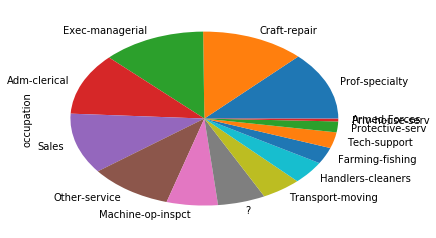

In [8]:
# Pie chart to display the proportion of data samples in each individual 'occupation' category. 
df['occupation'].value_counts().plot(kind='pie')

In [9]:
print(df[(df.age>=27)&(df.race=='Black')&(df['income_greater_50K']==True)].shape[0],df[(df.age>=27)&(df.race=='Black')].shape[0])
print(df[(df.age>=27)&(df.race=='White')&(df['income_greater_50K']==True)].shape[0],df[(df.age>=27)&(df.race=='White')].shape[0])

552 3668
10384 32540


In [4]:
print df.describe(include=[np.object])
df.isnull().describe()   # check to see if there are any NaN s

       workclass education      marital-status      occupation relationship  \
count      48842     48842               48842           48842        48842   
unique         9        16                   7              15            6   
top      Private   HS-grad  Married-civ-spouse  Prof-specialty      Husband   
freq       33906     15784               22379            6172        19716   

         race    sex native-country income  
count   48842  48842          48842  48842  
unique      5      2             42      2  
top     White   Male  United-States  <=50K  
freq    41762  32650          43832  37155  


,age,workclass,fnlwgt,education,education-num,marital-status,occupation,relationship,race,sex,capital-gain,capital-loss,hours-per-week,native-country,income,income_greater_50K
count,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842
unique,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
top,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False,False
freq,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842,48842


income  <=50K  >50K
sex                
Female  14423  1769
Male    22732  9918 Index(['Female', 'Male'], dtype='object', name='sex') Index(['<=50K', '>50K'], dtype='object', name='income')


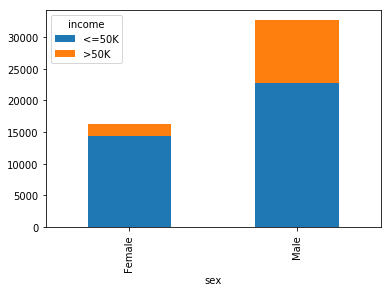

In [10]:
# Stacked bar chart to show  'income' breakdown per 'sex' 
a=df.groupby(['sex','income']).size()
b=a.unstack()
print(b, b.index,b.columns)
#b.plot(kind='bar',stacked=True)
b.plot(kind='bar',stacked=True)

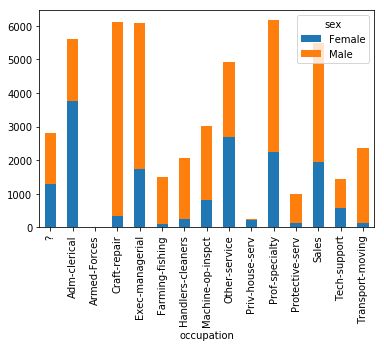

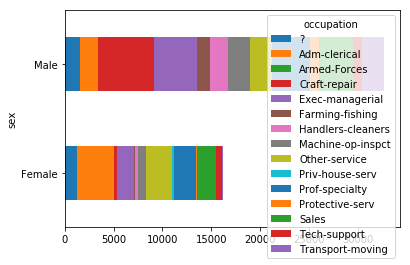

In [11]:
# Stacked bar chart to show  'sex' breakdown per 'occupation' 
a=df.groupby(['occupation','sex']).size()
b=a.unstack()
b.plot(kind='bar',stacked=True)
# Stacked bar chart to show  'occupation' breakdown per 'sex' 
df.groupby(['sex','occupation']).size().unstack().plot(kind='barh',stacked=True)

In [12]:
df.describe()

,age,fnlwgt,education-num,capital-gain,capital-loss,hours-per-week
count,48842.000000,4.884200e+04,48842.000000,48842.000000,48842.000000,48842.000000
mean,38.643585,1.896641e+05,10.078089,1079.067626,87.502314,40.422382
std,13.710510,1.056040e+05,2.570973,7452.019058,403.004552,12.391444
min,17.000000,1.228500e+04,1.000000,0.000000,0.000000,1.000000
25%,28.000000,1.175505e+05,9.000000,0.000000,0.000000,40.000000
50%,37.000000,1.781445e+05,10.000000,0.000000,0.000000,40.000000
75%,48.000000,2.376420e+05,12.000000,0.000000,0.000000,45.000000
max,90.000000,1.490400e+06,16.000000,99999.000000,4356.000000,99.000000


sex
Female    AxesSubplot(0.125,0.125;0.775x0.755)
Male      AxesSubplot(0.125,0.125;0.775x0.755)
Name: hours-per-week, dtype: object

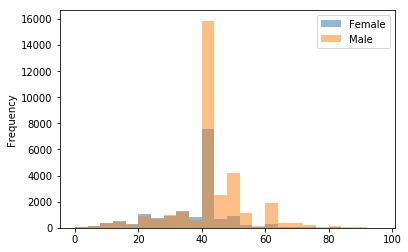

In [13]:
# Histogram to display 'hours-per-week' distribution per 'sex'
df.groupby(['sex'])['hours-per-week'].plot(kind='hist',legend=True,alpha=.5,bins=np.arange(start=0,stop=100,step=4))

In [14]:
# Figure out  ratio of '>=50K' income in each gender 
a= df.groupby(['sex','income']).size()
print("Ratio of women whose income is less than $50K: {}".\
      format(a.loc['Female'].loc['<=50K'].astype('float') / a.loc['Female'].astype('float').sum()))
print("Ratio of women whose income is greater than $50K: {}".\
      format(a.loc['Female'].loc['>50K'].astype('float') / a.loc['Female'].astype('float').sum()))

print("Ratio of men whose income is less than $50K: {}".\
      format(a.loc['Male'].loc['<=50K'].astype('float') / a.loc['Male'].astype('float').sum()))
print("Ratio of men whose income is greater than $50K: {}".\
      format(a.loc['Male'].loc['>50K'].astype('float') / a.loc['Male'].astype('float').sum()))

Ratio of women whose income is less than $50K: 0.8907485177865613
Ratio of women whose income is greater than $50K: 0.10925148221343874
Ratio of men whose income is less than $50K: 0.6962327718223583
Ratio of men whose income is greater than $50K: 0.3037672281776417


### Drop `fnlwgt` feature column and convert all non-numerical features to numerical ones  

In [15]:
df.drop('fnlwgt',axis=1,inplace=True)
target=df['income_greater_50K'].astype('int')
features=df.drop(['income','income_greater_50K'],axis=1)
features.dtypes
features_numeric=pd.get_dummies(features)
features_numeric.columns

Index(['age', 'education-num', 'capital-gain', 'capital-loss',
       'hours-per-week', 'workclass_ ?', 'workclass_ Federal-gov',
       'workclass_ Local-gov', 'workclass_ Never-worked', 'workclass_ Private',
       ...
       'native-country_Portugal', 'native-country_Puerto-Rico',
       'native-country_Scotland', 'native-country_South',
       'native-country_Taiwan', 'native-country_Thailand',
       'native-country_Trinadad&Tobago', 'native-country_United-States',
       'native-country_Vietnam', 'native-country_Yugoslavia'],
      dtype='object', length=107)

### Split the single dataframe into a dataframe storing train data  and a dataframe storing test data

In [16]:
"""
train_features= features_numeric.iloc[:32561]
test_features= features_numeric.iloc[32561:]
train_target= target.iloc[:32561]
test_target= target.iloc[32561:]
"""
train_features= features_numeric.iloc[:]
train_target= target.iloc[:]

## Step 2: Cross-validation on a number of candidate classifiers

### Import `sklearn` libraries

In [18]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import cross_val_score
from sklearn.ensemble import AdaBoostClassifier
from sklearn.tree import DecisionTreeClassifier

In [21]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.svm import SVC

In [17]:
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
scaler=StandardScaler()
clf = LogisticRegression(solver='lbfgs')
pipeline= Pipeline([('transformer',scaler),('estimator',clf)])
#pipeline= Pipeline([('estimator',clf)])
scores= cross_val_score(pipeline,train_features.values,train_target.values,cv=8,n_jobs=-1,verbose=2)
print(scores)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(),scores.std()*2))


[CV]  ................................................................


/home/yxh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[CV] ................................................. , total=   1.1s
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:    1.1s remaining:    0.0s
/home/yxh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[CV] ................................................. , total=   1.1s
[CV]  ................................................................


/home/yxh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[CV] ................................................. , total=   1.0s
[CV]  ................................................................


/home/yxh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[CV] ................................................. , total=   1.0s
[CV]  ................................................................


/home/yxh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[CV] ................................................. , total=   0.8s
[CV]  ................................................................


/home/yxh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[CV] ................................................. , total=   1.2s
[CV]  ................................................................


/home/yxh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[CV] ................................................. , total=   1.2s
[CV]  ................................................................


/home/yxh/anaconda3/lib/python3.6/site-packages/sklearn/utils/validation.py:475: DataConversionWarning: Data with input dtype int64 was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


[CV] ................................................. , total=   1.4s
[0.84490665 0.84752702 0.85620701 0.85454545 0.85470925 0.84979525
 0.85339885 0.85042595]
Accuracy: 0.8514 (+/- 0.0074)


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:    8.8s finished


### Choose a classifier and perform cross validation on it

In [ ]:
#scaler=StandardScaler()
clf = SVC(C=1.0,cache_size=300,kernel='rbf')
#pipeline= Pipeline([('transformer',scaler),('estimator',clf)])
pipeline= Pipeline([('estimator',clf)])
#clf=SVC(kernel='poly',cache_size=500)
scores= cross_val_score(pipeline,train_features.values,train_target.values,cv=5,n_jobs=-1,verbose=2)
print(scores)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(),scores.std()*2))
"""
SVC(C=1.0, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='auto', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)
"""

[CV]  ................................................................


In [20]:
#clf = RandomForestClassifier(n_estimators=500)
#clf=DecisionTreeClassifier(max_depth=5)
clf= AdaBoostClassifier(DecisionTreeClassifier(max_depth=1),
                         algorithm="SAMME",
                         n_estimators=400)
scores= cross_val_score(clf,train_features.values,train_target.values,cv=8,n_jobs=-1,verbose=9)
print(scores)
print("Accuracy: %0.4f (+/- %0.4f)" % (scores.mean(),scores.std()*2))

[CV]  ................................................................
[CV] ....................... , score=0.8542417294464462, total=  50.3s
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Done   1 out of   1 | elapsed:   50.3s remaining:    0.0s


[CV] ....................... , score=0.8504749426793318, total=  43.6s
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Done   2 out of   2 | elapsed:  1.6min remaining:    0.0s


[CV] ....................... , score=0.8632492630199804, total=  43.5s
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Done   3 out of   3 | elapsed:  2.3min remaining:    0.0s


[CV] ....................... , score=0.8607698607698607, total=  46.8s
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Done   4 out of   4 | elapsed:  3.1min remaining:    0.0s


[CV] ....................... , score=0.8635544635544635, total=  44.6s
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Done   5 out of   5 | elapsed:  3.8min remaining:    0.0s


[CV] ....................... , score=0.8578214578214578, total=  44.8s
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Done   6 out of   6 | elapsed:  4.6min remaining:    0.0s


[CV] ........................ , score=0.860933660933661, total=  46.0s
[CV]  ................................................................


[Parallel(n_jobs=-1)]: Done   7 out of   7 | elapsed:  5.3min remaining:    0.0s


[CV] ....................... , score=0.8576343381389253, total=  42.1s
[0.85424173 0.85047494 0.86324926 0.86076986 0.86355446 0.85782146
 0.86093366 0.85763434]
Accuracy: 0.8586 (+/- 0.0085)


[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  6.0min remaining:    0.0s
[Parallel(n_jobs=-1)]: Done   8 out of   8 | elapsed:  6.0min finished


## Step 3: Learn a classifier and evaluate its performance on test dataset

### Pick the _"best"_ classifier based on cross-validation and fit the classifier with the whole train dataset

In [38]:
"""
Some cross validation results
Random forests:
Accuracy: 0.8461 (+/- 0.0082)  ---> 100 trees
Accuracy: 0.8464 (+/- 0.0097) --->150 trees
Accuracy: 0.8475 (+/- 0.0105)  ---> 200 trees
Accuracy: 0.8475 (+/- 0.0088) ---> 500 trees
Adaboost:  
Accuracy: 0.8549 (+/- 0.0081) ---> 100 basic classifiers
 Accuracy: 0.8567 (+/- 0.0068)  ----> 200 basic classifiers (*)
 Accuracy: 0.8563 (+/- 0.0085)   ----> 300 basic classifiers
"""
clf.fit(train_features.values,train_target.values)

AdaBoostClassifier(algorithm='SAMME',
          base_estimator=DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=1,
            max_features=None, max_leaf_nodes=None,
            min_impurity_decrease=0.0, min_impurity_split=None,
            min_samples_leaf=1, min_samples_split=2,
            min_weight_fraction_leaf=0.0, presort=False, random_state=None,
            splitter='best'),
          learning_rate=1.0, n_estimators=200, random_state=None)

### Use fitted classifier to predict the results for test dataset

In [ ]:
results_predicted = clf.predict(test_features.values)

### Compare predicted results with actual ones and print out test error ratio

In [40]:
compare = results_predicted!= test_target.values
print("Test error ratio: {}".format(float(np.sum(compare.astype('int')))/float(np.size(compare.astype('int')))))

Test error ratio: 0.142620232172
